## Implement the intensity transformation

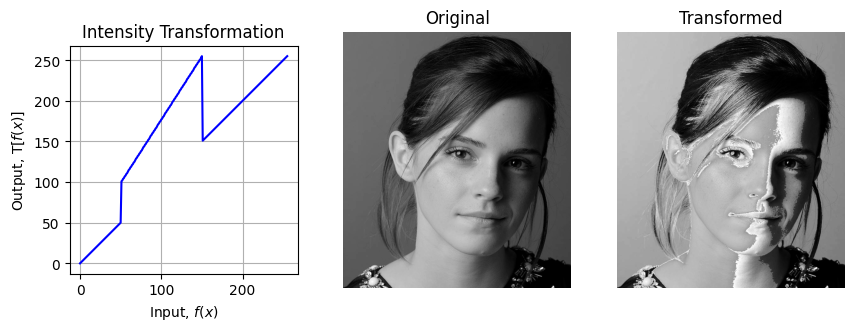

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread(r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\emma.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None

# Control points
c = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Compute the piecewise linear intensity transformation based on the control points
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1).astype('uint8')  # from 0 to c[0]
t2 = np.linspace(c[0, 1] + 1, c[1, 1], c[1, 0] - c[0, 0]).astype('uint8')  # from c[0] to c[1]
t3 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')  # from c[1] to c[2]
t4 = np.linspace(c[2, 1] + 1, c[3, 1], c[3, 0] - c[2, 0]).astype('uint8')  # from c[2] to c[3]
t5 = np.linspace(c[3, 1] + 1, c[4, 1], 255 - c[3, 0]).astype('uint8')  # from c[3] to c[4]

# Concatenate the piecewise linear transformation parts
t = np.concatenate((t1, t2), axis=0).astype('uint8')
t = np.concatenate((t, t3), axis=0).astype('uint8')
t = np.concatenate((t, t4), axis=0).astype('uint8')
t = np.concatenate((t, t5), axis=0).astype('uint8')

# Apply the piecewise linear transformation
g = cv.LUT(f, t)

# Display the results
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].plot(t, 'b', label='Transformation')
ax[0].set_xlabel(r'Input, $f(x)$')
ax[0].set_ylabel(r'Output, $\mathrm{T}[f(x)]$')
ax[0].set_title('Intensity Transformation')
ax[0].set_aspect('equal')
ax[0].grid(True)
ax[1].imshow(f, cmap='gray')
ax[1].set_title('Original')
ax[1].axis('off')
ax[2].imshow(g, cmap='gray')
ax[2].set_title('Transformed')
ax[2].axis('off')
plt.show()